Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer ->

Anomaly Detection (also known as Outlier Detection) is the process of identifying data points, events, or observations that deviate significantly from the dataset's normal behavior. These anomalies often indicate critical incidents, such as technical glitches, fraud, or changes in consumer behavior.

Types of Anomalies:

Point Anomalies:

Definition: A single data instance is considered anomalous if it is too far from the rest of the data.

Example: A credit card transaction of $10,000 occurs for a user whose typical transaction is around $50. This single point is an outlier.

Contextual Anomalies (Conditional Anomalies):

Definition: A data instance is anomalous only in a specific context (e.g., time or location) but might be normal in another.

Example: A temperature of 35°C (95°F) is normal in New Delhi during June (summer) but would be a contextual anomaly if recorded in January (winter).

Collective Anomalies:

Definition: A collection of related data instances is anomalous with respect to the entire dataset, even if the individual points might not be anomalies on their own.

Example: In an ECG (heart rate monitor), a single flat-line point might not be weird, but a sequence of flat-line points for 5 seconds indicates a collective anomaly (cardiac arrest).

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Answer:AlgorithmApproachSuitable Use CasesIsolation ForestTree-based: It explicitly isolates anomalies instead of profiling normal points. It builds random trees; anomalies are isolated closer to the root (shorter path length) because they are easier to separate from the rest.High-dimensional data, large datasets, and scenarios where anomalies are few and distinct (e.g., fraud detection, network security).DBSCAN (Density-Based Spatial Clustering)Density-based: It groups points that are closely packed together (high density). Points that lie in low-density regions and do not belong to any cluster are labeled as noise/outliers.Spatial data, datasets with irregular cluster shapes, and when the number of clusters is unknown (e.g., geographical data analysis).LOF (Local Outlier Factor)Density-based: It measures the local density deviation of a data point compared to its neighbors. A point with a significantly lower density than its neighbors is considered an outlier.Situations where density varies across the dataset (e.g., detecting defects in manufacturing where "normal" density varies by region).

Question 3: What are the key components of a Time Series? Explain each with one example.

Answer:

A Time Series is typically decomposed into four key components:

Trend:

Explanation: The long-term progression of the series (increasing, decreasing, or stable) over a long period.

Example: The steady increase in the global population over the last 50 years.

Seasonality:

Explanation: Repeating patterns or cycles that occur over a fixed period (e.g., daily, monthly, yearly).

Example: Retail sales spiking every December due to holiday shopping.

Cyclical:

Explanation: Fluctuations that occur over regular periods but are not of fixed frequency (often related to economic conditions). Unlike seasonality, the duration of these cycles varies (usually longer than a year).

Example: Economic recessions and booms (business cycles) that happen every few years.

Irregular (Noise/Residual):

Explanation: Random, unpredictable fluctuations in the data that are not caused by the trend or seasonality.

Example: A sudden drop in airline passengers due to an unexpected volcanic eruption or a pandemic.

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer:

Stationarity:A time series is said to be stationary if its statistical properties—specifically the mean, variance, and autocovariance—remain constant over time. Stationary data is easier to model because it does not have trends or seasonality influencing the predictions.

How to Test for Stationarity:

Visual Inspection: Plotting the rolling mean and variance to see if they change over time.

Statistical Test (Augmented Dickey-Fuller Test - ADF): This is the most common test.

Null Hypothesis ($H_0$): The series is non-stationary.

Alternative Hypothesis ($H_1$): The series is stationary.

If the p-value is < 0.05, we reject the null hypothesis and conclude the series is stationary.

How to Transform Non-Stationary to Stationary:

Differencing: Subtracting the current observation from the previous one ($y_t - y_{t-1}$). This removes trends.

Log Transformation: Taking the log of the values to stabilize non-constant variance (heteroscedasticity).

De-trending: Modeling the trend component and subtracting it from the original series.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

ModelFull NameStructure / Key ComponentsApplicationARAutoRegressiveUses past values to predict future values. Depends on parameter $p$ (lag order).Good for data where current value depends strongly on immediate past values (e.g., stock prices).MAMoving AverageUses past forecast errors to predict future values. Depends on parameter $q$ (moving average order).Used when data has sudden shocks or impulses that affect future values.ARIMAAutoRegressive Integrated Moving AverageCombines AR and MA, plus Integration (I). Uses parameters $(p, d, q)$. $d$ is the degree of differencing to make data stationary.General-purpose forecasting for non-seasonal, non-stationary data (e.g., yearly sales data).SARIMASeasonal ARIMAExtension of ARIMA that supports seasonality. Adds seasonal parameters $(P, D, Q)m$ where $m$ is the season length.Used for data with clear seasonal patterns (e.g., monthly ice cream sales, electricity demand).SARIMAXSeasonal ARIMA with eXogenous regressorsExtension of SARIMA that includes external variables (X).Used when an external factor influences the series (e.g., predicting ice cream sales using temperature as an external variable).

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

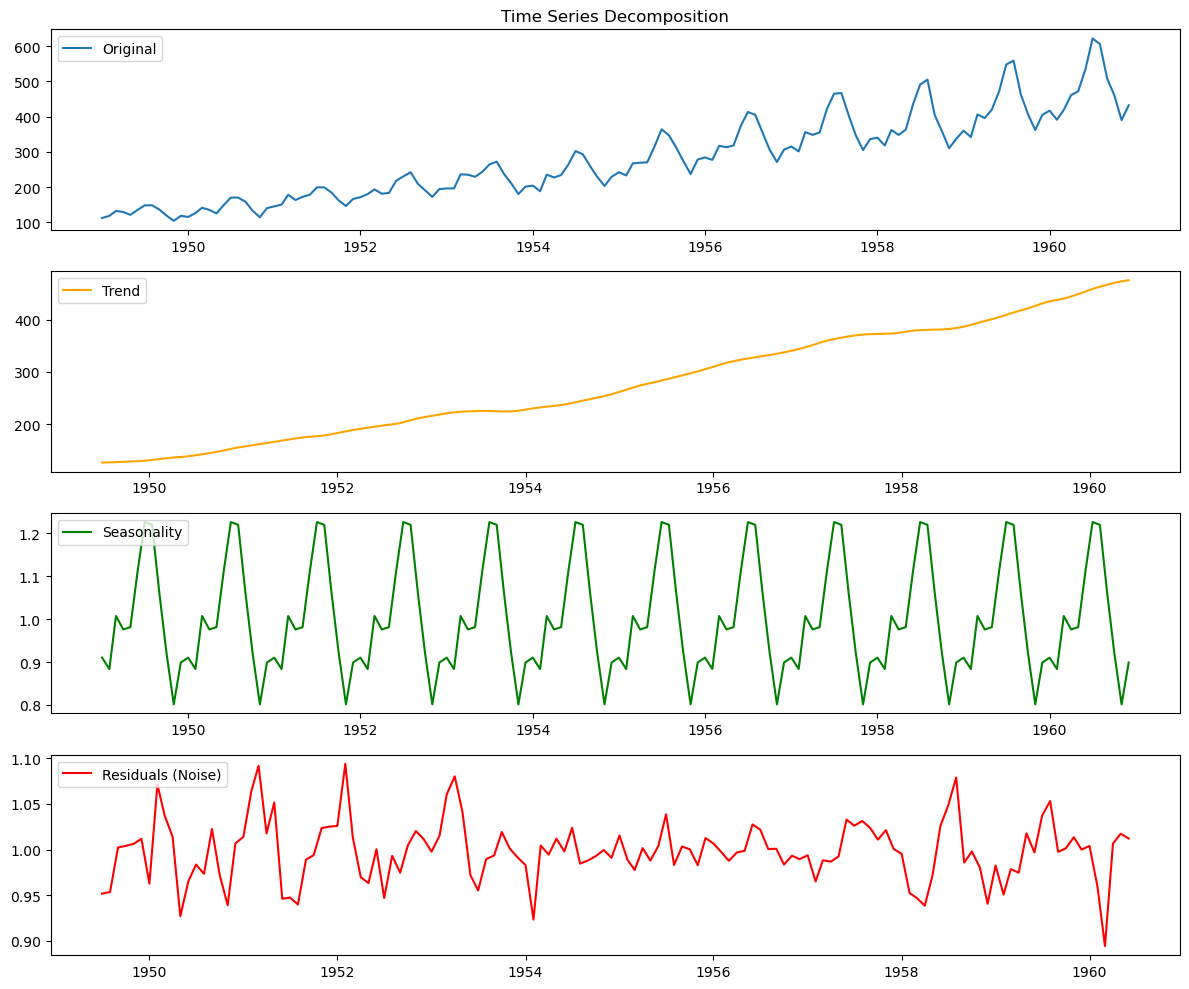

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# 1. Load the AirPassengers dataset (available in seaborn for convenience)
# Alternatively, you can load via pd.read_csv('AirPassengers.csv')
df = sns.load_dataset('flights')

# Convert 'year' and 'month' to a datetime index for time series analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('date', inplace=True)
ts_data = df['passengers']

# 2. Decompose the time series
# 'multiplicative' is often better for AirPassengers as variance increases with time
decomposition = seasonal_decompose(ts_data, model='multiplicative')

# 3. Plot the original and decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(ts_data, label='Original')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals (Noise)', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

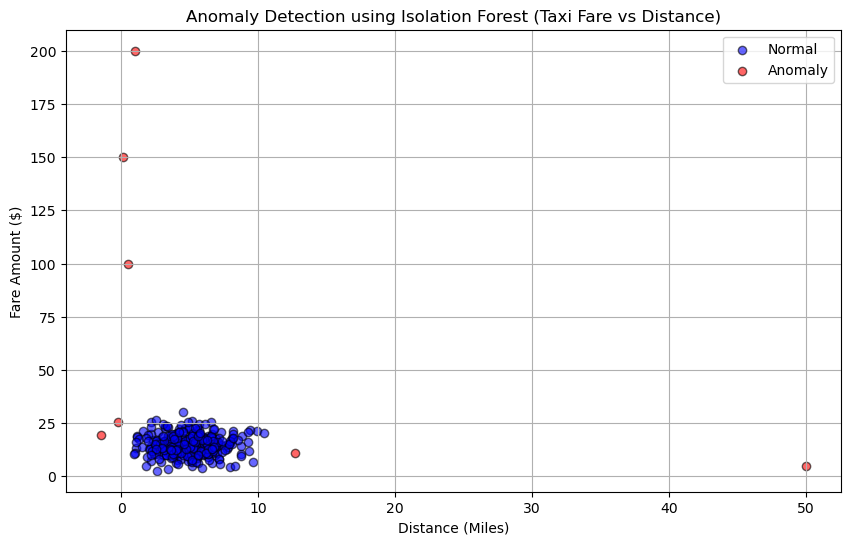

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate a sample dataset resembling NYC Taxi Fare
# (Using synthetic data ensures code runs immediately without external file dependencies)
np.random.seed(42)
n_samples = 300
data = {
    'distance_miles': np.random.normal(5, 2, n_samples),
    'fare_amount': np.random.normal(15, 5, n_samples)
}
df = pd.DataFrame(data)

# Introduce some artificial anomalies (e.g., high fare for low distance)
anomalies = pd.DataFrame({
    'distance_miles': [0.5, 1.0, 50.0, 0.1],
    'fare_amount': [100, 200, 5, 150]
})
df = pd.concat([df, anomalies], ignore_index=True)

# 2. Train Isolation Forest
# contamination=0.02 means we expect roughly 2% of data to be outliers
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df[['distance_miles', 'fare_amount']])

# Isolation Forest labels: 1 is Normal, -1 is Anomaly
# Map them for clearer plotting: 'Normal' vs 'Anomaly'
df['anomaly_label'] = df['anomaly_score'].map({1: 'Normal', -1: 'Anomaly'})

# 3. Visualize on a 2D Scatter Plot
plt.figure(figsize=(10, 6))
colors = {'Normal': 'blue', 'Anomaly': 'red'}

for label, color in colors.items():
    subset = df[df['anomaly_label'] == label]
    plt.scatter(subset['distance_miles'], subset['fare_amount'], 
                c=color, label=label, alpha=0.6, edgecolors='k')

plt.title('Anomaly Detection using Isolation Forest (Taxi Fare vs Distance)')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


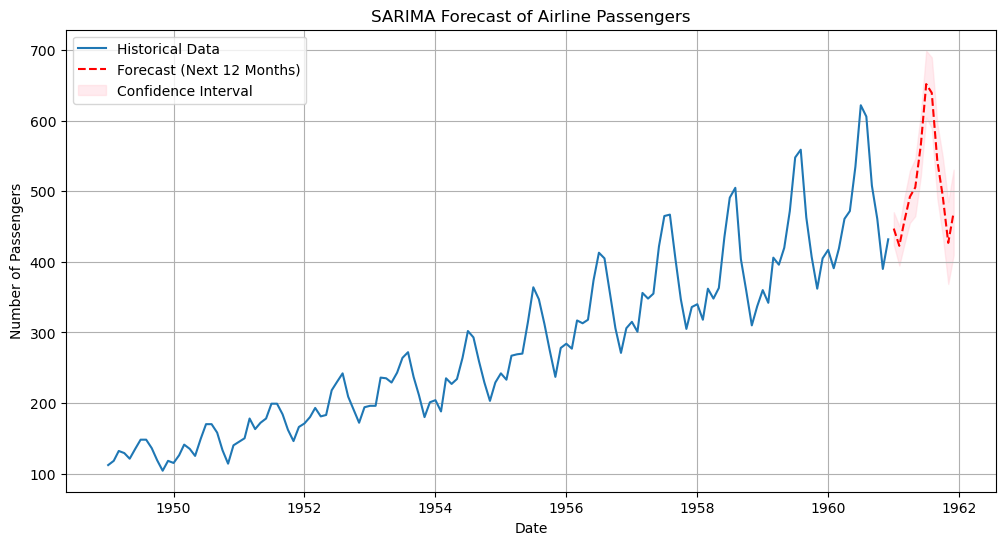

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load Data
df = sns.load_dataset('flights')
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('date', inplace=True)
y = df['passengers']

# 2. Define and Train SARIMA Model
# Using standard parameters for AirPassengers: Order(1,1,1) Seasonal(1,1,1,12)
# In a real scenario, you would determine these using ACF/PACF plots or Grid Search
model = SARIMAX(y, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# 3. Forecast the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(y.index, y, label='Historical Data')

# Plot forecast
plt.plot(forecast_index, forecast_values, label='Forecast (Next 12 Months)', color='red', linestyle='--')

# Plot confidence intervals (shaded region)
plt.fill_between(forecast_index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.title('SARIMA Forecast of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

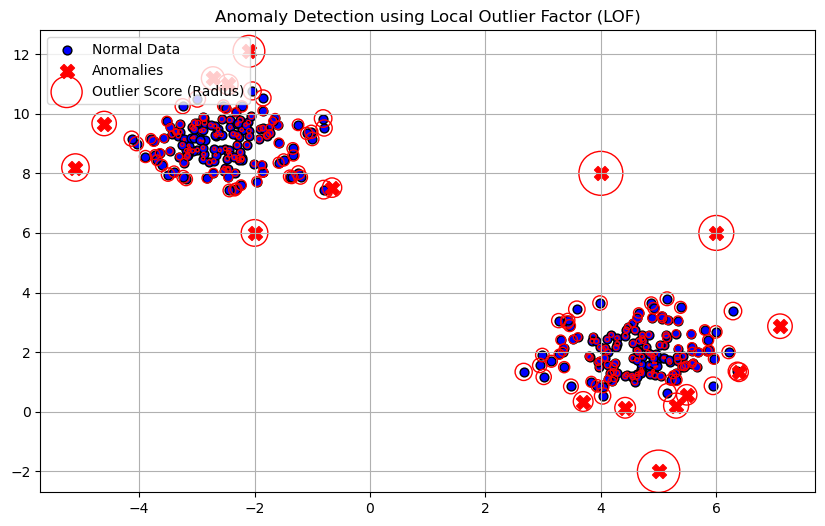

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# 1. Generate a synthetic dataset with clusters
# We create 300 normal points centered at two locations
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=42)

# 2. Add some manual outliers (anomalies)
outliers = np.array([
    [6, 6],
    [-2, 6],
    [5, -2],
    [4, 8]
])
# Combine normal data with outliers
X_combined = np.vstack([X, outliers])

# 3. Apply Local Outlier Factor (LOF)
# n_neighbors=20 is a typical default.
# contamination='auto' allows the model to estimate the proportion of outliers, 
# or we can set a float (e.g., 0.05).
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_combined)

# y_pred gives 1 for inliers (normal) and -1 for outliers (anomalies)
# LOF also provides negative_outlier_factor_ (lower scores = more abnormal)

# 4. Visualization
plt.figure(figsize=(10, 6))

# Plot Inliers (Normal points)
plt.scatter(X_combined[y_pred == 1][:, 0], X_combined[y_pred == 1][:, 1], 
            c='blue', label='Normal Data', s=40, edgecolors='k')

# Plot Outliers (Anomalies)
plt.scatter(X_combined[y_pred == -1][:, 0], X_combined[y_pred == -1][:, 1], 
            c='red', label='Anomalies', s=100, marker='X')

# Plot circles around points proportional to their outlier score
# (The larger the circle, the more "outlier-ish" the point is)
radius = (lof.negative_outlier_factor_.max() - lof.negative_outlier_factor_) / (lof.negative_outlier_factor_.max() - lof.negative_outlier_factor_.min())
plt.scatter(X_combined[:, 0], X_combined[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier Score (Radius)')

plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow.

Answer:

Real-Time Data Science Workflow for Power Grid Monitoring:

1. Anomaly Detection Strategy:

Chosen Algorithm: Isolation Forest.

Reasoning:

Efficiency: Isolation Forest is computationally efficient and works well with high-dimensional data (energy usage + weather features). It has a low linear time complexity, which is crucial for processing streaming data every 15 minutes.

Nature of Data: Power grid spikes (anomalies) are distinct "few and different" events. Isolation Forest is excellent at isolating these global anomalies quickly compared to LOF, which is slower and better suited for local density deviations.

Workflow: I would train the model on historical "normal" behavior. As new 15-minute batches arrive, the model scores them. If a score exceeds the threshold, an alert is triggered.

2. Forecasting Model Selection:

Chosen Model: SARIMAX (Seasonal ARIMA with eXogenous regressors).

Reasoning:

Seasonality (S): Energy consumption has strong seasonal patterns: daily (peak hours vs. night), weekly (weekdays vs. weekends), and yearly (summer vs. winter). SARIMAX explicitly handles these cycles.

Exogenous Variables (X): Energy demand is heavily dependent on external factors provided in the dataset, specifically Weather Conditions (temperature, humidity). Using SARIMAX allows us to input weather forecasts to improve the energy demand prediction, which standard ARIMA/SARIMA cannot do.

3. Validation and Monitoring:

Backtesting (Time Series Cross-Validation): Instead of a random train-test split, I would use a "rolling window" approach. I would train on months 1-6 and test on month 7, then train on 1-7 and test on 8, ensuring the model respects the temporal order.

Metrics:

MAE (Mean Absolute Error): To measure the average magnitude of errors in megawatts.

MAPE (Mean Absolute Percentage Error): To understand the error relative to the total load (e.g., "we were off by 2%").

Drift Monitoring: I would monitor the distribution of the input data (e.g., did average temperature shift drastically?) and the model's error rate over time. If the error rate increases (model drift), the model needs to be retrained with recent data.

4. Business Impact:

Grid Stability: Detecting anomalies in real-time prevents blackouts by allowing operators to balance the load immediately or isolate faulty grid sections.

Cost Reduction: Accurate forecasting allows the company to purchase or generate exactly the amount of energy needed, minimizing the waste of surplus energy or the high cost of buying emergency power during peak shortages.

Resource Planning: Helps in scheduling maintenance during predicted low-consumption periods.